In [1]:
# !pip install plotly

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import sys

from os.path import basename
from typing import Dict, Callable

from pathlib import Path
import pickle

import pandas as pd

from collections import namedtuple

from operator import itemgetter

%matplotlib inline

/home/laugustyniak/anaconda3/envs/python36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/laugustyniak/anaconda3/envs/python36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')
from aspects.analysis.nlp_architect import get_metrics

In [5]:
sys.path.append('/home/laugustyniak/github/phd/nlp-architect/')

In [36]:
model_f1_by_word_embedding = {}
for word_embedding_models_path in list(Path('../models').glob('*')):
    models_f1 = []
    
    models_paths = word_embedding_models_path.glob('*10epoch*')
    models_metrics = get_metrics(models_paths)
    for model_name, model_metrics in models_metrics.items():
        models_f1.append((model_name, model_metrics.f1))
    models_f1.sort(key=itemgetter(1), reverse=True)
    model_f1_by_word_embedding[word_embedding_models_path.stem] = models_f1
#     print(word_embedding_models_path.stem)
#     print(models_f1)
#     print()

In [37]:
model_f1_by_word_embedding

{'sota-google': [('model-info-char-word-bilstm-crf-10epochs-restaurants-train.conll',
   80.58573452999528),
  ('model-info-word-bilstm-crf-10epochs-restaurants-train.conll',
   80.01850138760406),
  ('model-info-char-word-bilstm-10epochs-restaurants-train.conll',
   79.31488801054017),
  ('model-info-char-word-lstm-crf-10epochs-restaurants-train.conll',
   78.19905213270142),
  ('model-info-word-bilstm-10epochs-restaurants-train.conll',
   77.46672785681504),
  ('model-info-word-lstm-crf-10epochs-restaurants-train.conll',
   77.37824305871642),
  ('model-info-char-word-lstm-10epochs-restaurants-train.conll',
   74.8978665456196),
  ('model-info-word-lstm-10epochs-restaurants-train.conll', 74.2756804214223),
  ('model-info-char-bilstm-10epochs-restaurants-train.conll',
   48.964418481147106),
  ('model-info-char-bilstm-crf-10epochs-restaurants-train.conll',
   47.7577169481654),
  ('model-info-char-lstm-10epochs-restaurants-train.conll', 45.73033707865169),
  ('model-info-char-lstm-crf

In [9]:
models_f1.sort(key=itemgetter(1), reverse=True)

In [10]:
models_f1

[('model-info-word-bilstm-crf-10epochs-restaurants-train.conll',
  84.39620081411125),
 ('model-info-char-word-bilstm-crf-10epochs-restaurants-train.conll',
  84.30286241920591),
 ('model-info-word-lstm-crf-10epochs-restaurants-train.conll',
  83.41528833258828),
 ('model-info-char-word-lstm-crf-10epochs-restaurants-train.conll',
  81.35593220338984),
 ('model-info-char-word-bilstm-10epochs-restaurants-train.conll',
  81.11510791366906),
 ('model-info-word-bilstm-10epochs-restaurants-train.conll',
  80.60801473975127),
 ('model-info-word-lstm-10epochs-restaurants-train.conll', 79.52755905511812),
 ('model-info-char-word-lstm-10epochs-restaurants-train.conll',
  79.45084145261292),
 ('model-info-char-bilstm-crf-10epochs-restaurants-train.conll',
  51.684152401987845),
 ('model-info-char-bilstm-10epochs-restaurants-train.conll',
  45.16509433962264),
 ('model-info-char-lstm-10epochs-restaurants-train.conll', 39.027355623100306),
 ('model-info-char-lstm-crf-10epochs-restaurants-train.conl

In [11]:
def get_models_params_from_name(model_name: str):
    return ' '.join(model_name.split('-')[2:-3])

In [12]:
from typing import Dict

In [20]:
def draw_metrics(models_metrics: Dict, title=None):
    pd.DataFrame.from_dict({
        get_models_params_from_name(k): v
        for k, v
        in list(models_metrics.items())
    }, orient='index').sort_index(axis=0).plot(kind='bar', figsize=(25,12), title=title)

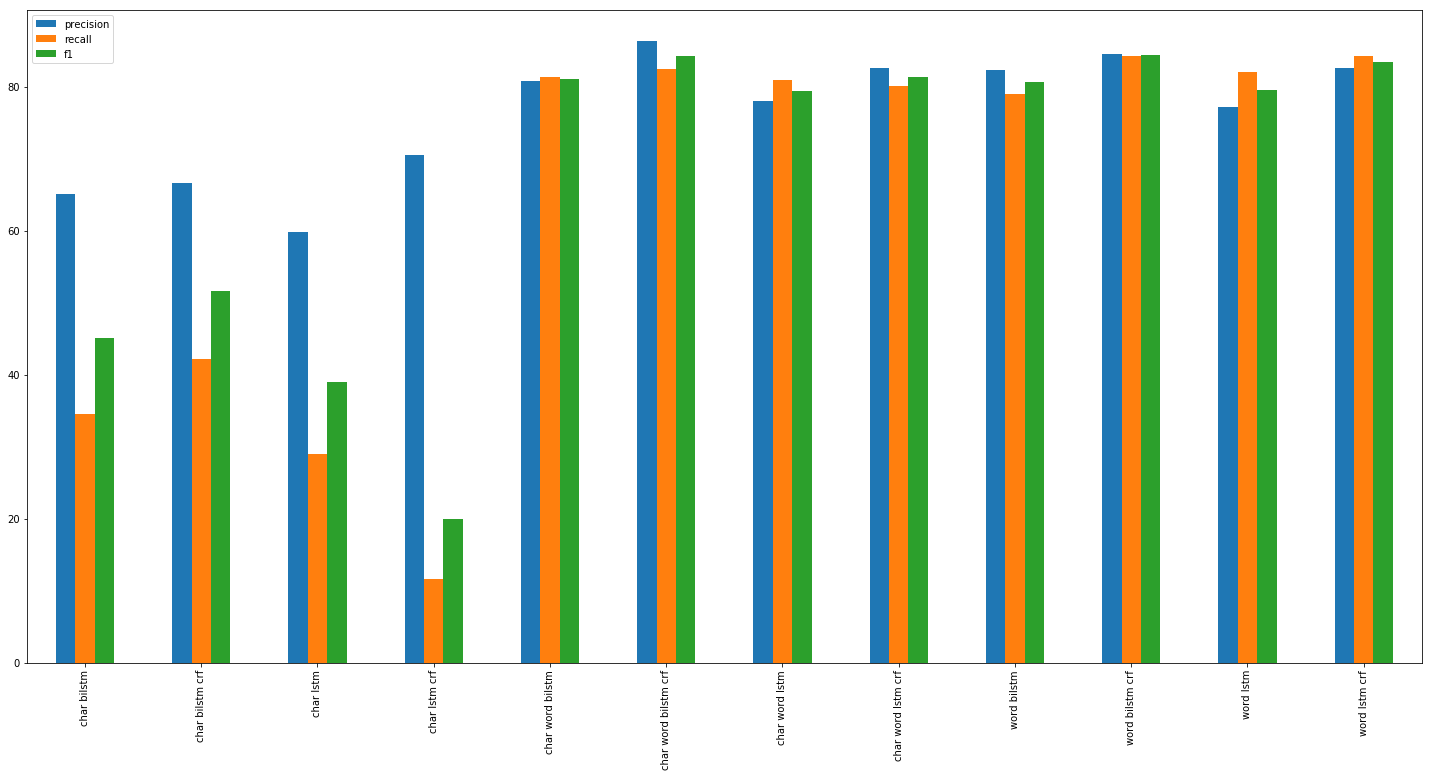

In [15]:
draw_metrics(models_metrics)

In [33]:
list(models_metrics.items())

[('model-info-word-lstm-crf-10epochs-restaurants-train.conll',
  Metrics(precision=82.63950398582817, recall=84.2057761732852, f1=83.41528833258828)),
 ('model-info-word-bilstm-crf-10epochs-restaurants-train.conll',
  Metrics(precision=84.58748866727109, recall=84.2057761732852, f1=84.39620081411125)),
 ('model-info-char-lstm-10epochs-restaurants-train.conll',
  Metrics(precision=59.77653631284916, recall=28.971119133574007, f1=39.027355623100306)),
 ('model-info-word-lstm-10epochs-restaurants-train.conll',
  Metrics(precision=77.16468590831919, recall=82.03971119133574, f1=79.52755905511812)),
 ('model-info-char-word-lstm-crf-10epochs-restaurants-train.conll',
  Metrics(precision=82.6046511627907, recall=80.14440433212997, f1=81.35593220338984)),
 ('model-info-char-word-bilstm-crf-10epochs-restaurants-train.conll',
  Metrics(precision=86.29489603024575, recall=82.40072202166066, f1=84.30286241920591)),
 ('model-info-char-bilstm-crf-10epochs-restaurants-train.conll',
  Metrics(precisio

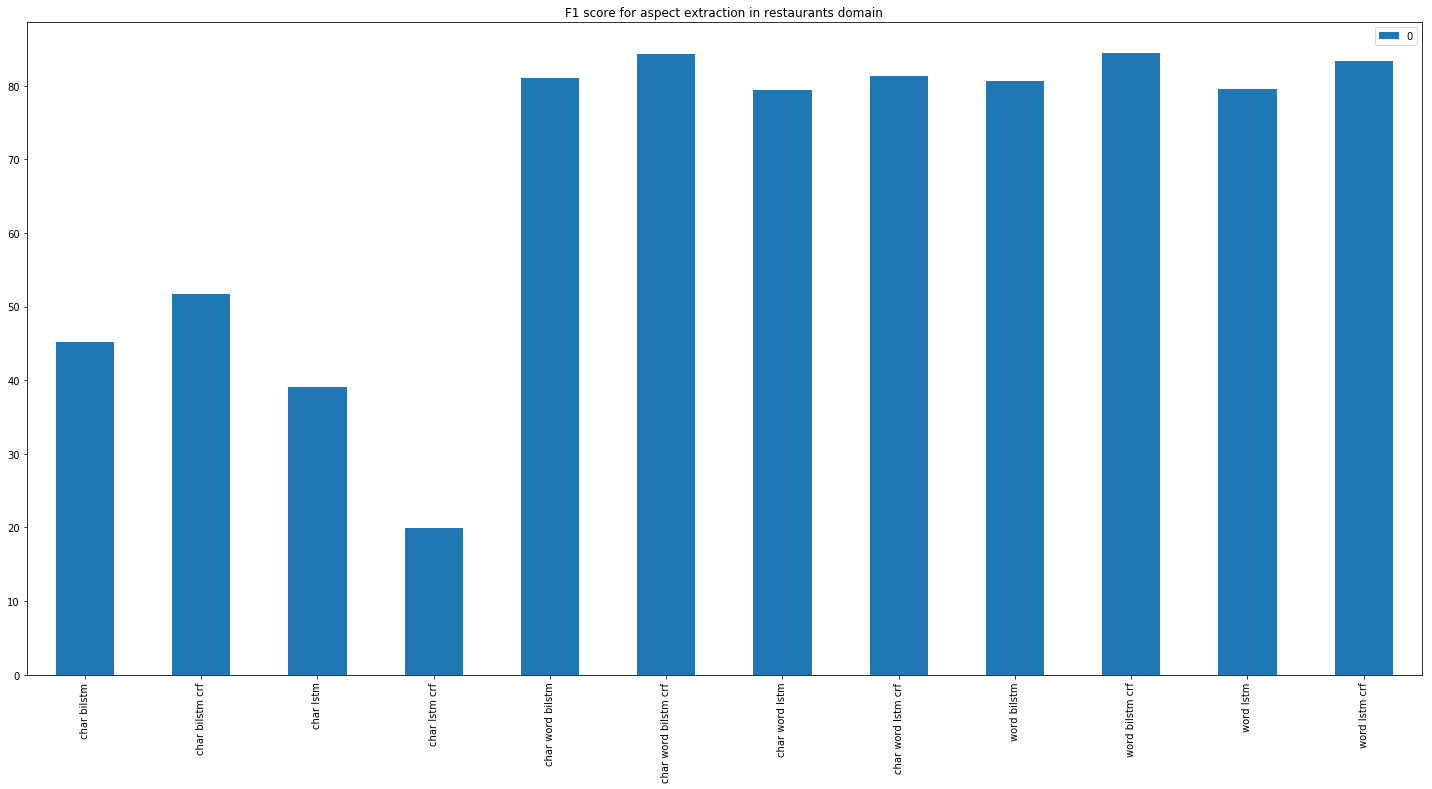

In [21]:
draw_metrics(dict(models_f1))

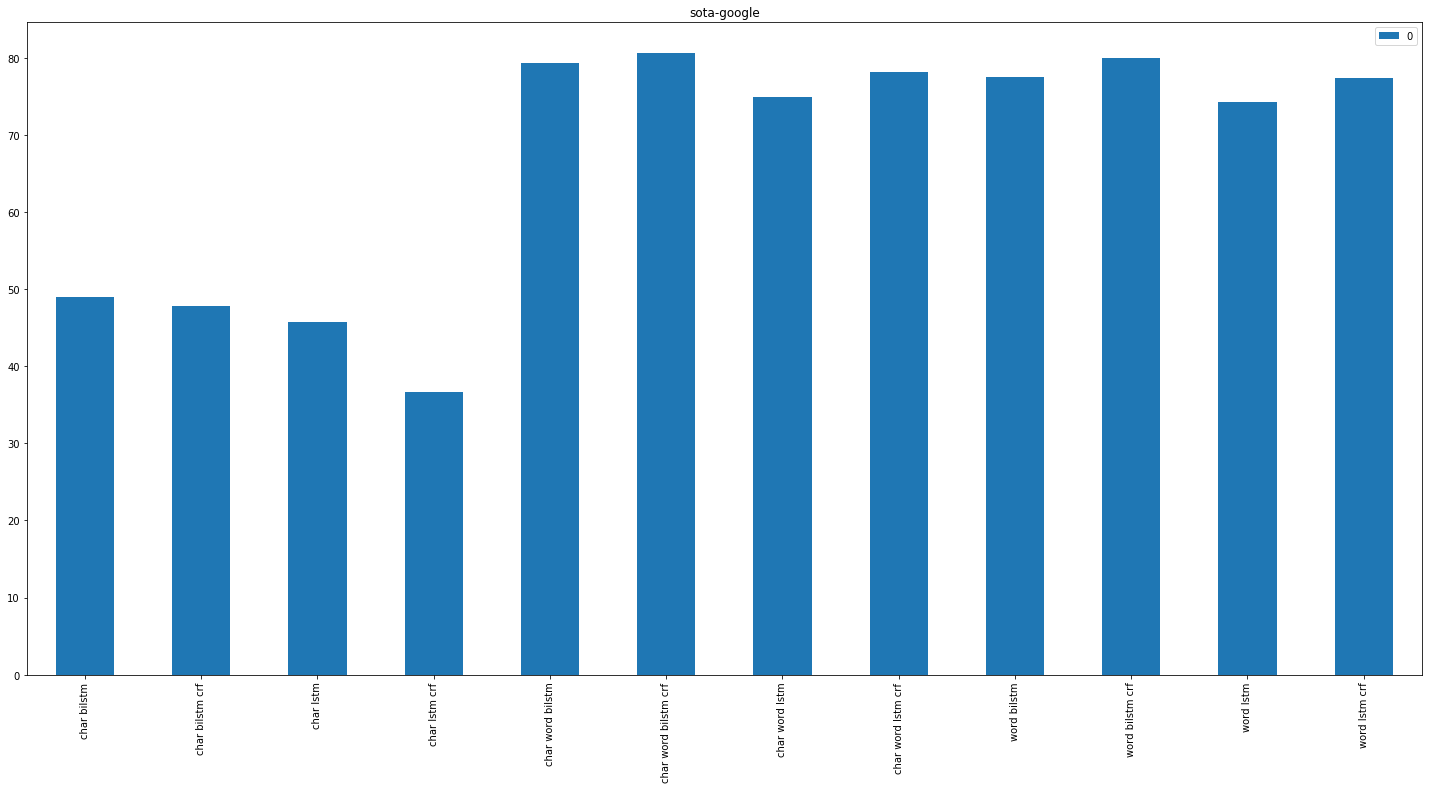

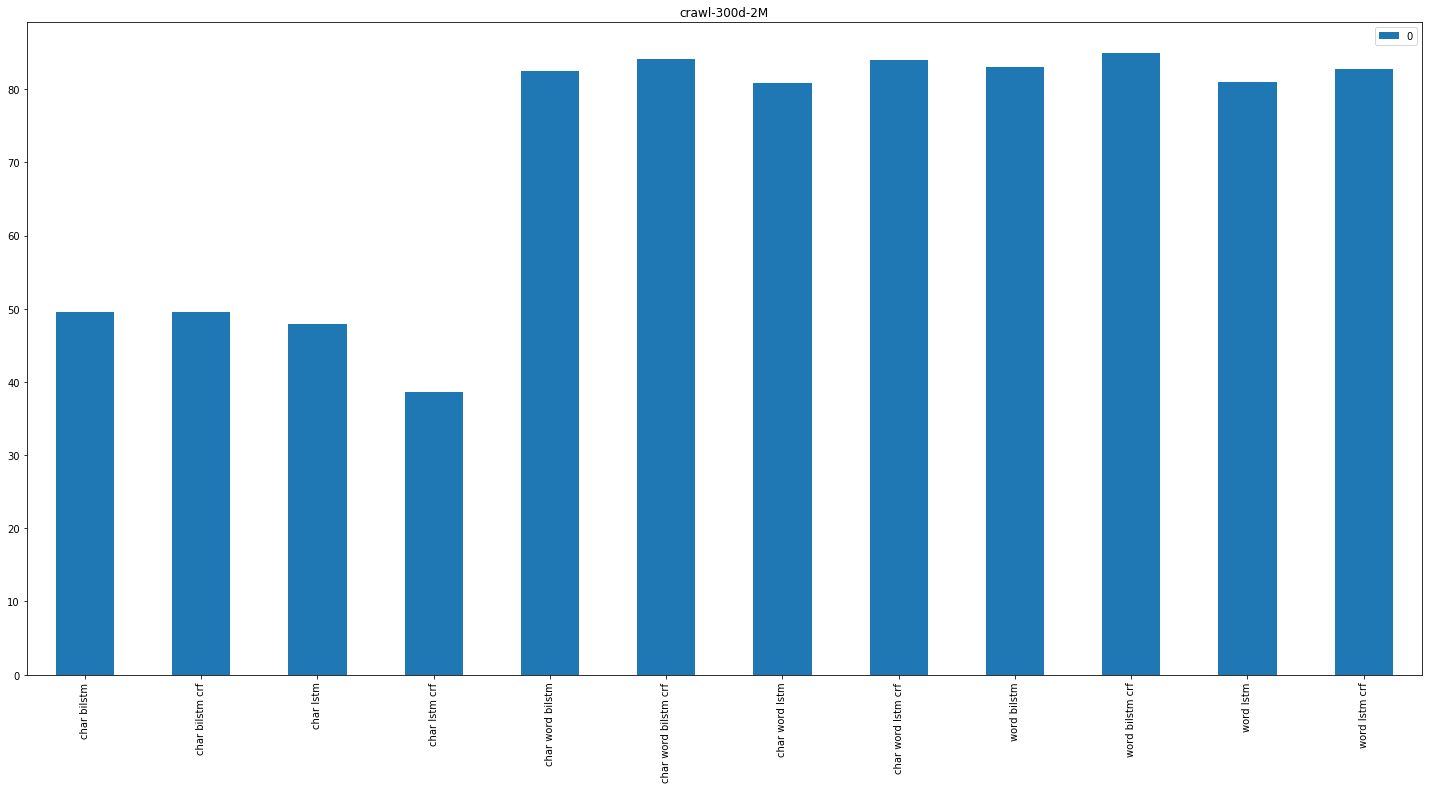

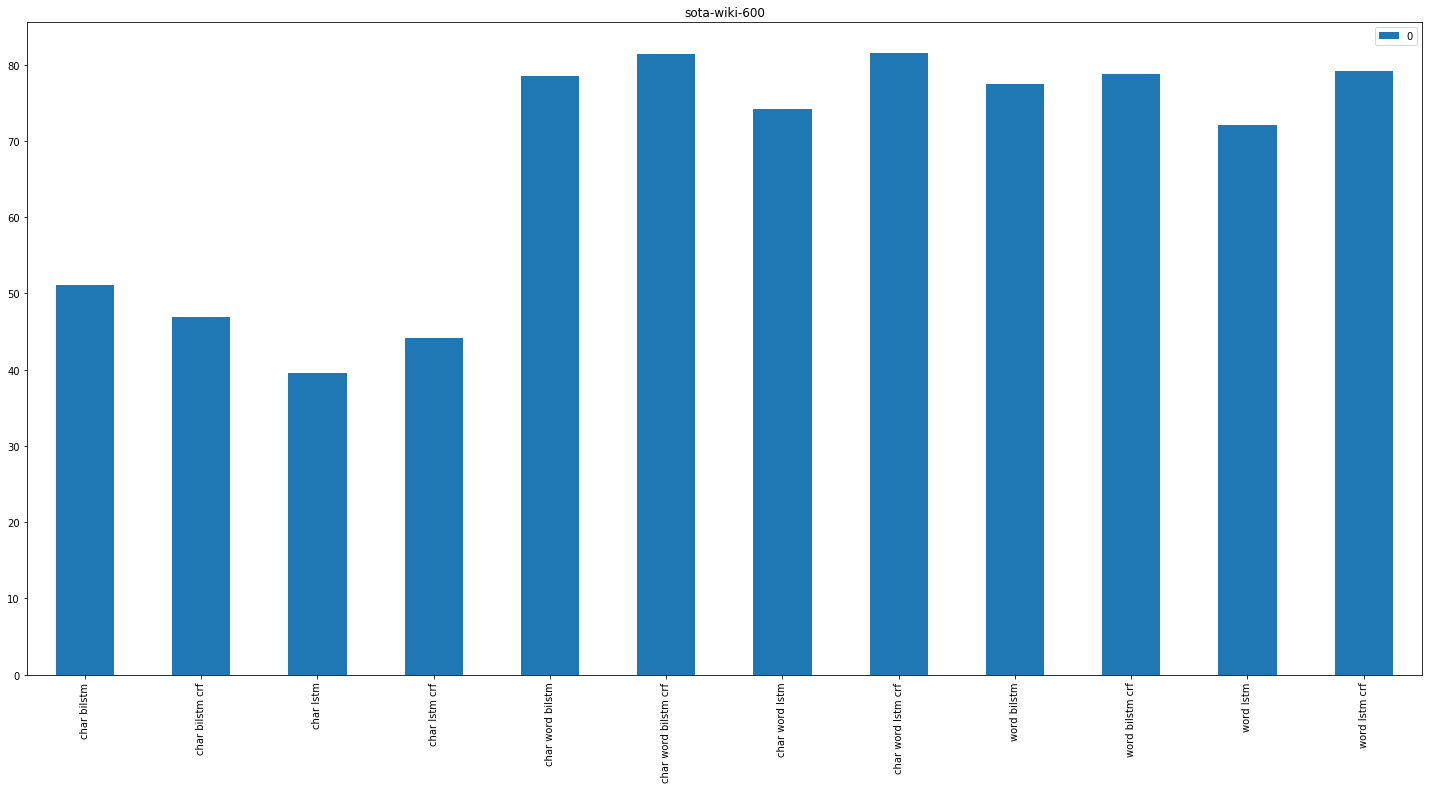

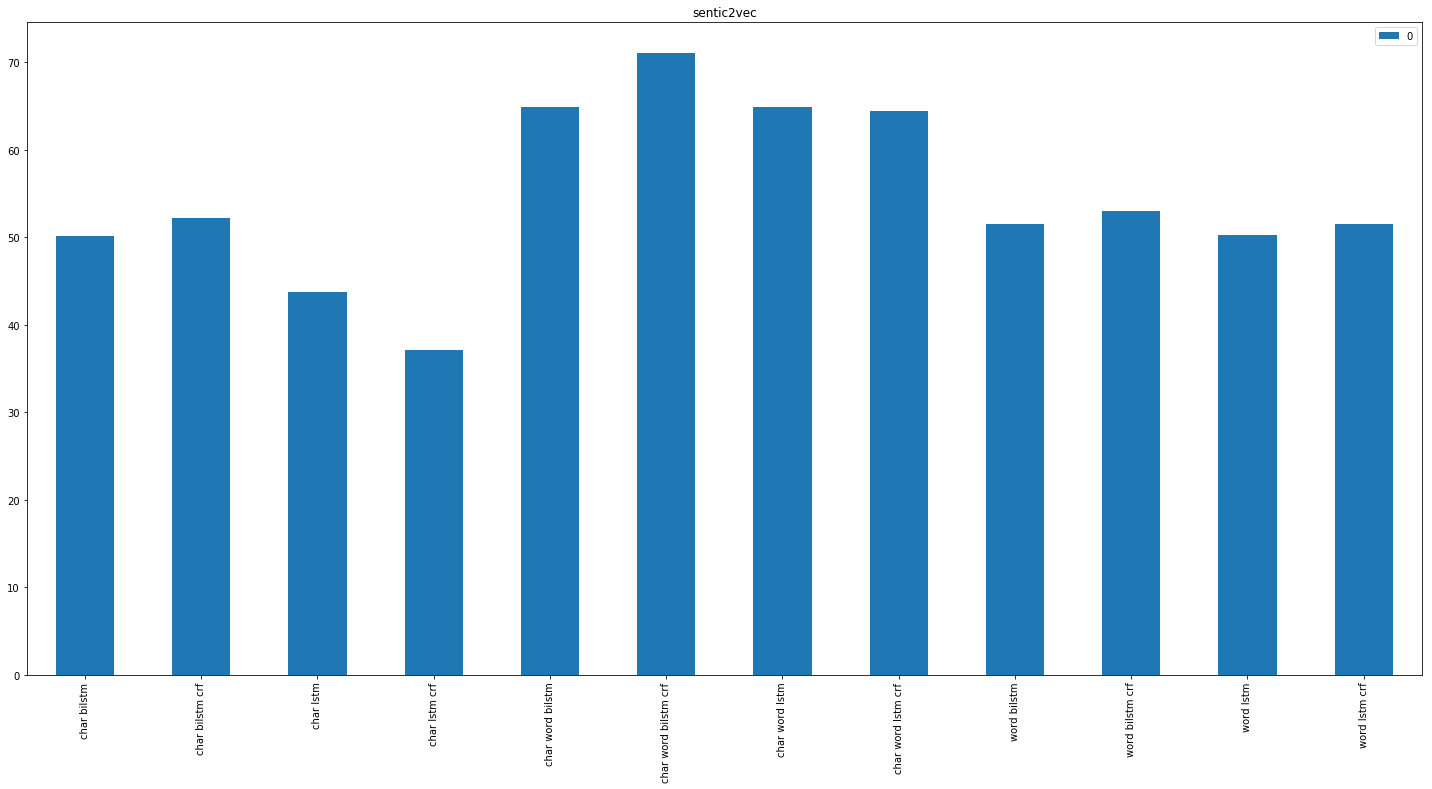

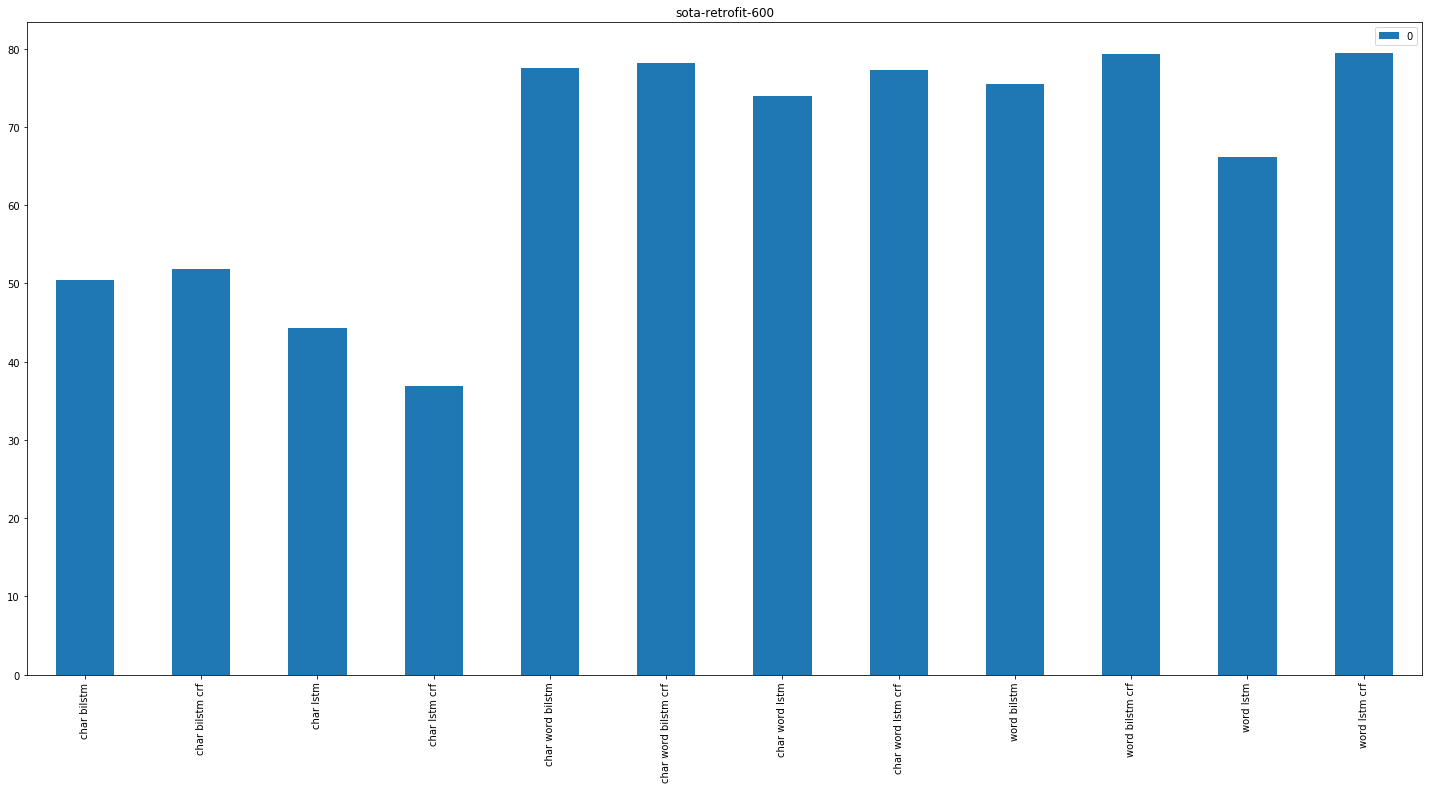

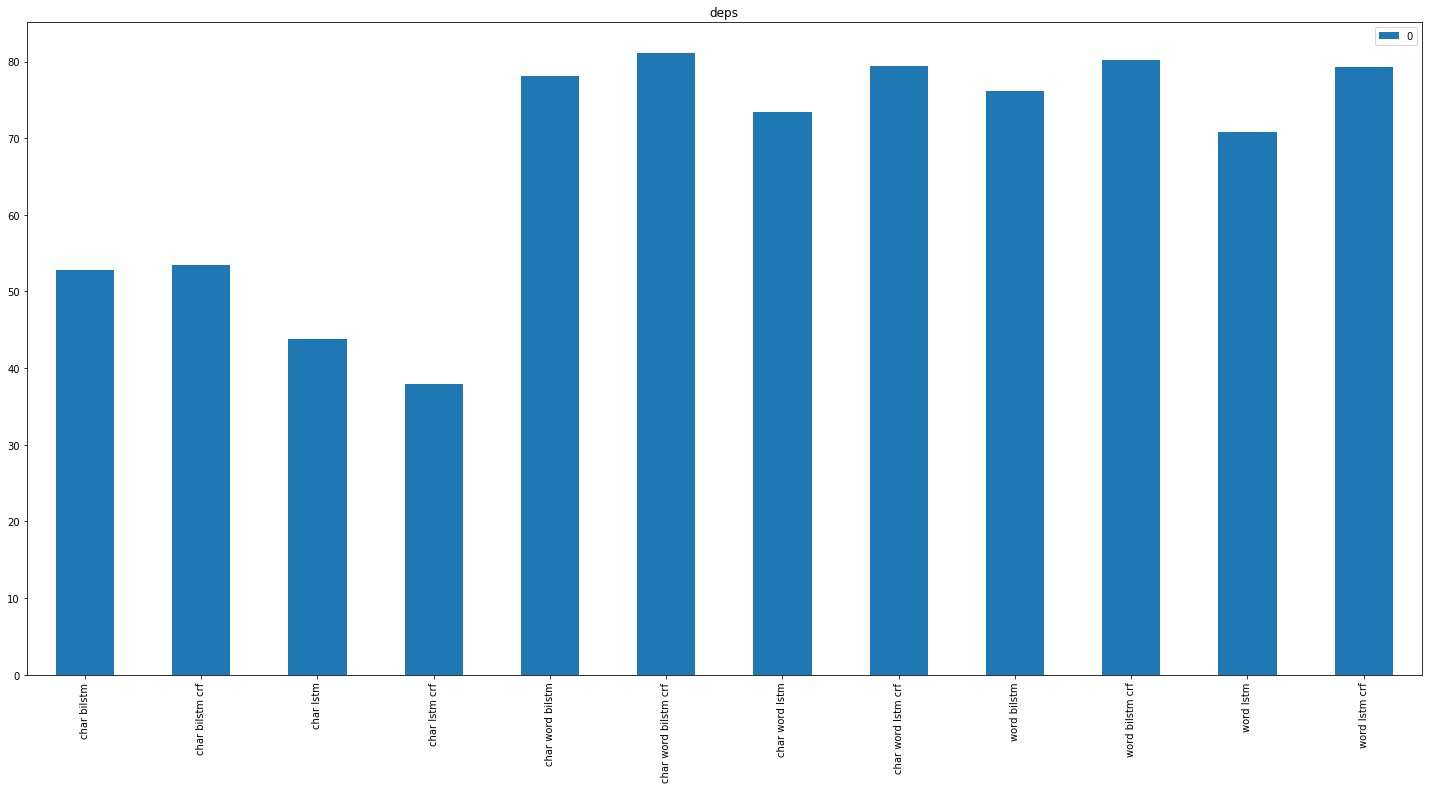

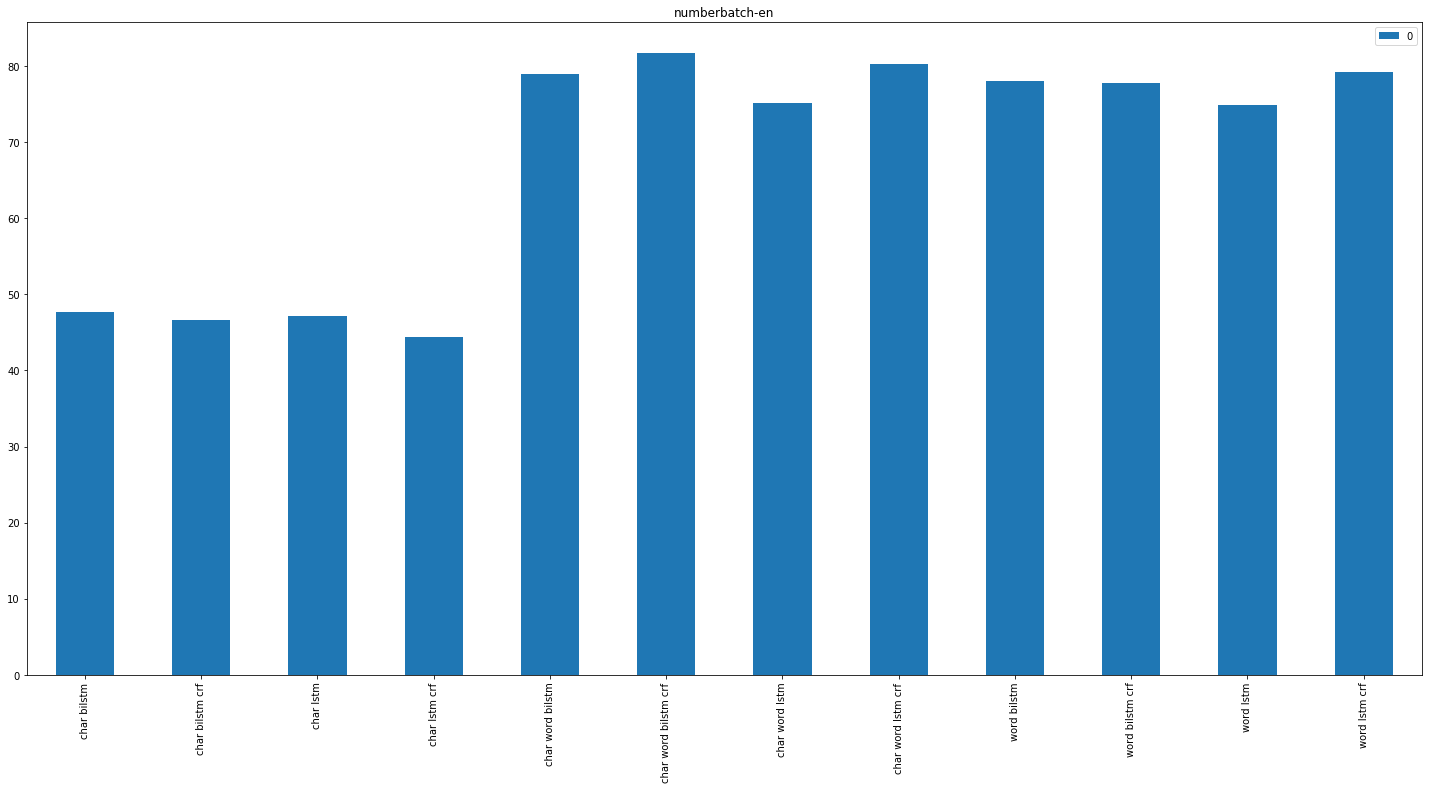

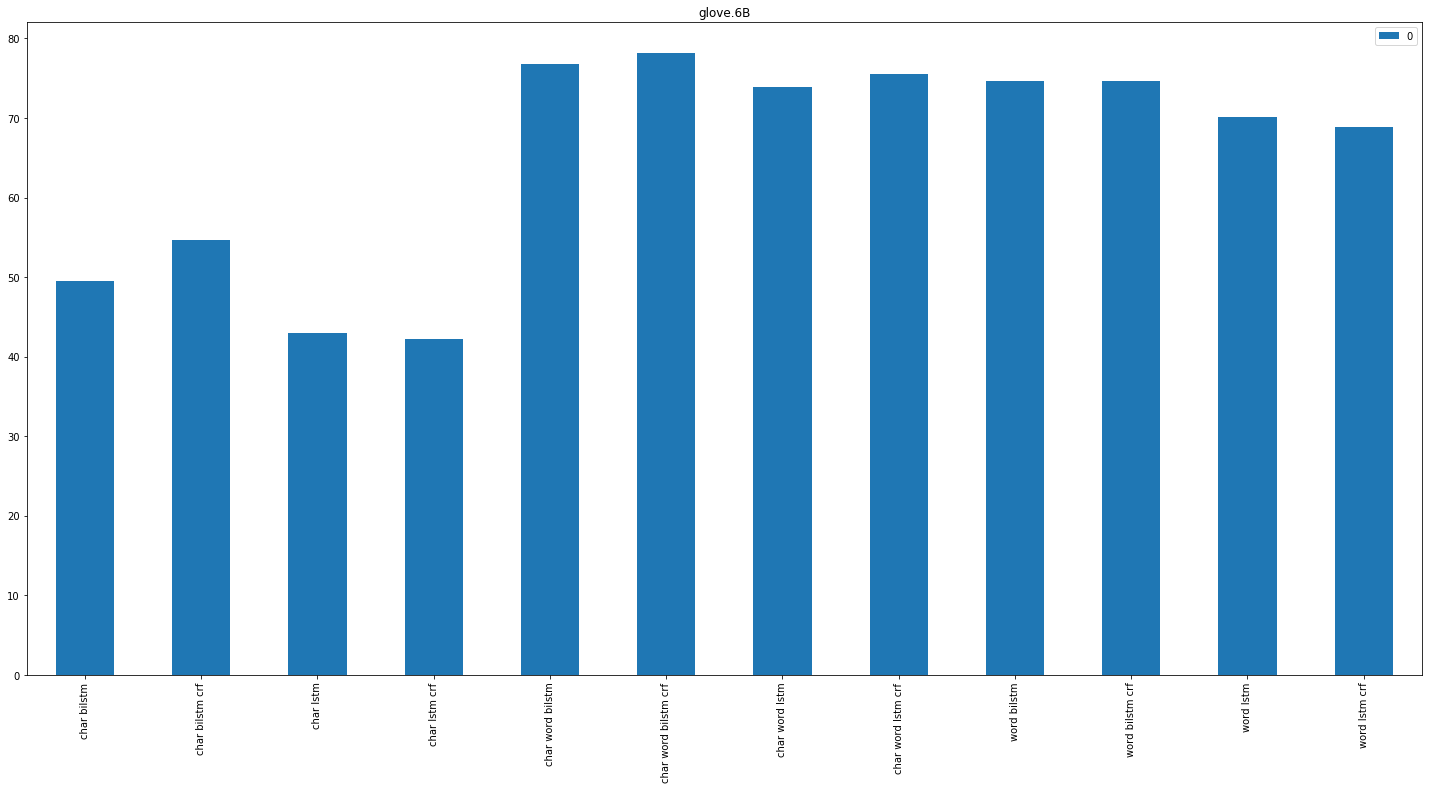

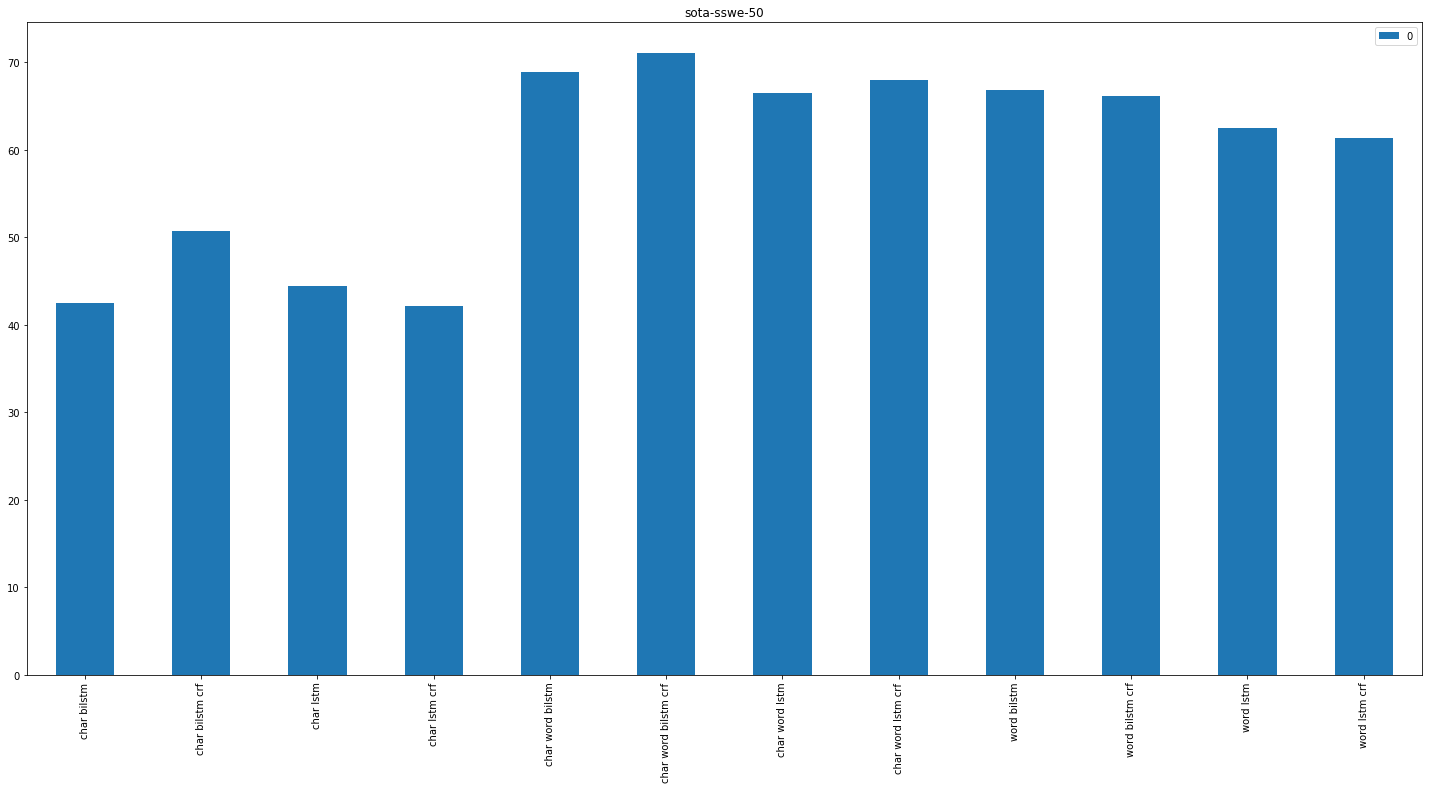

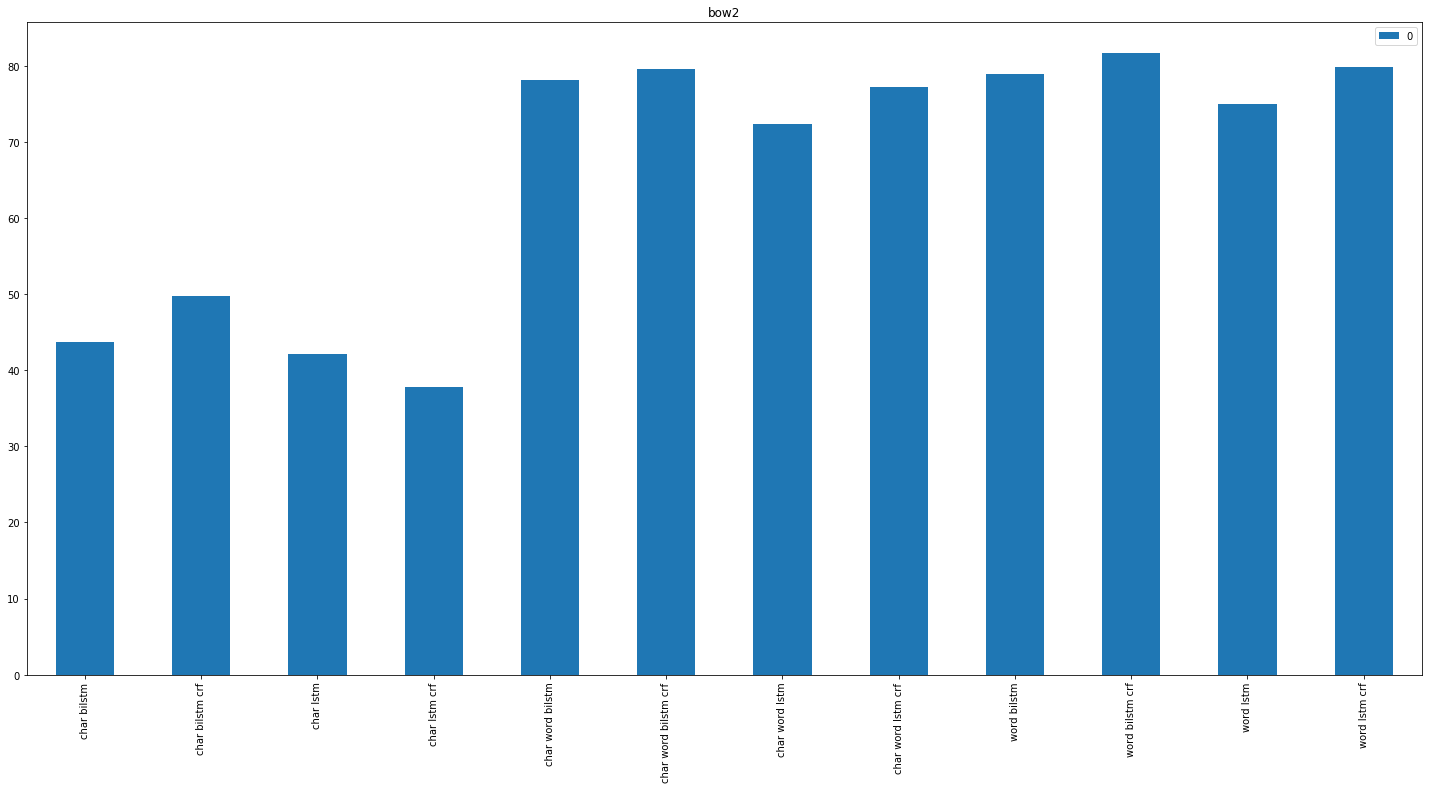

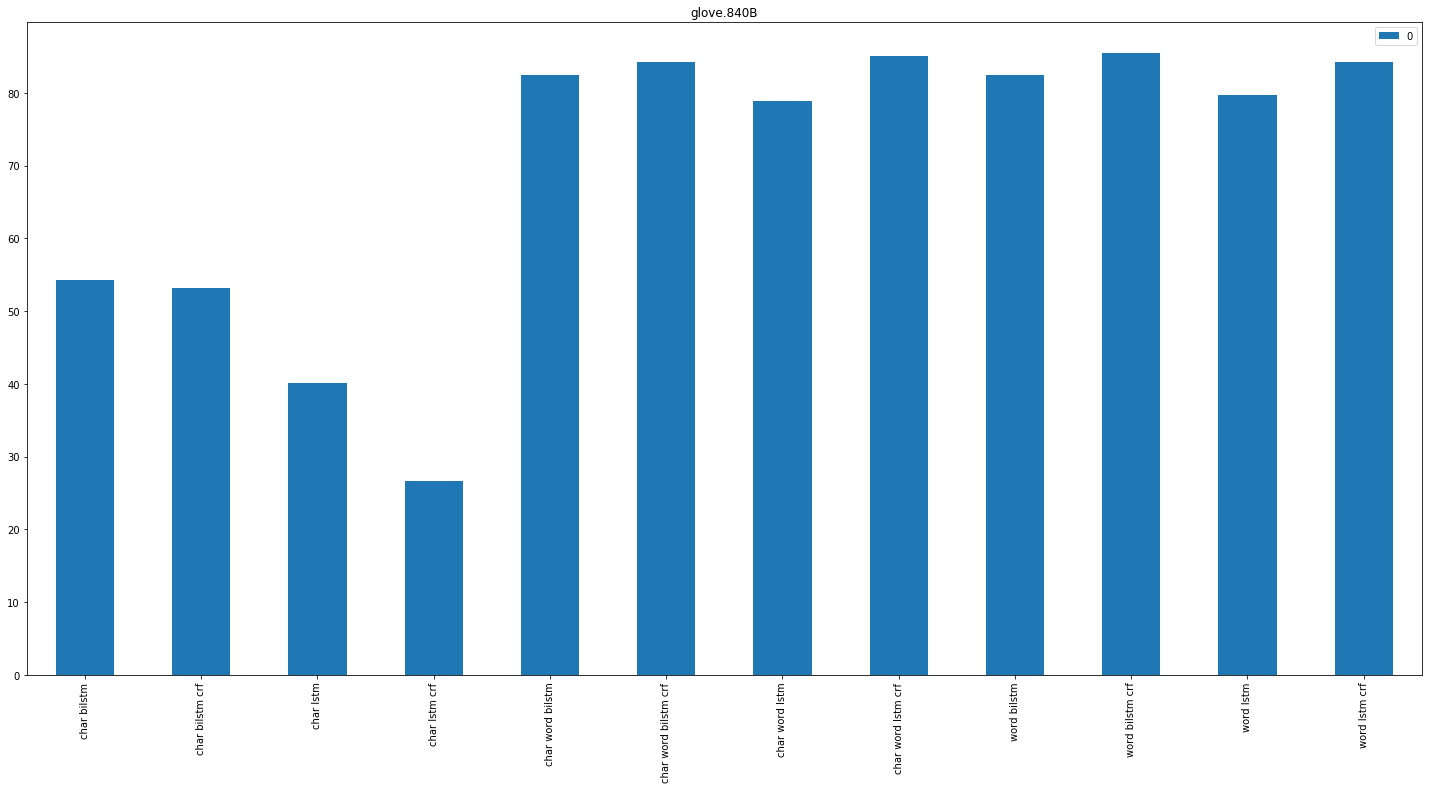

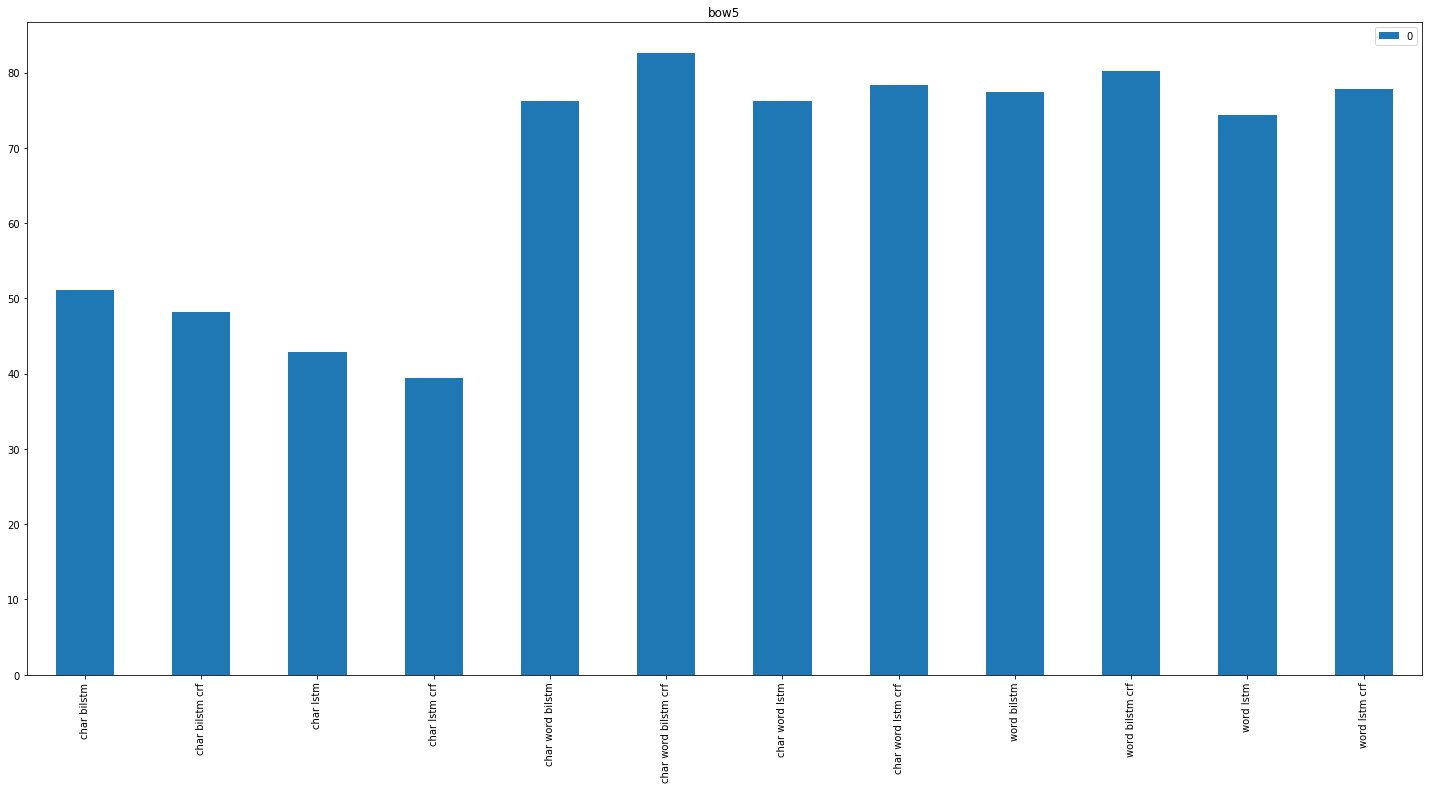

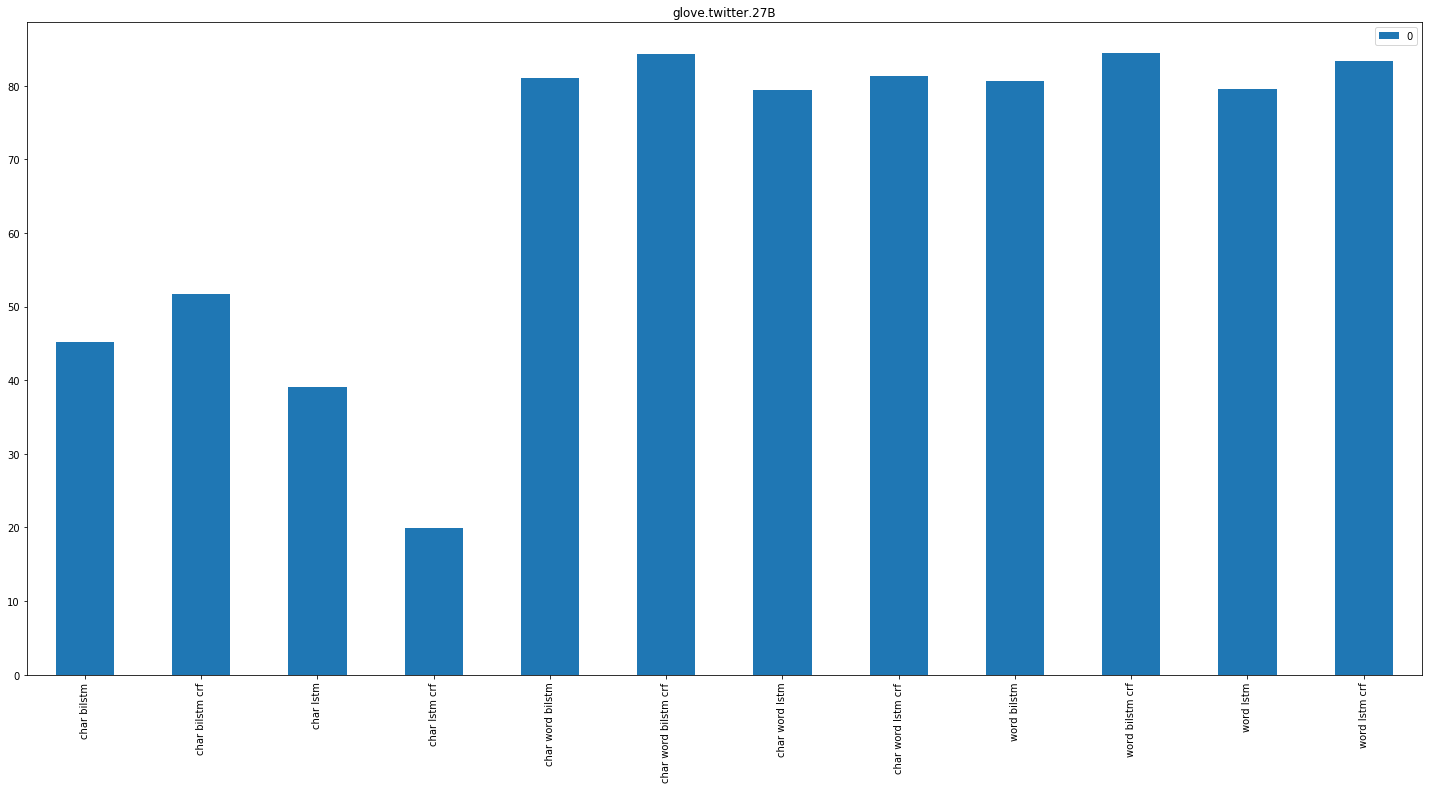

In [43]:
for we_name, we_f1 in model_f1_by_word_embedding.items():
    draw_metrics(dict(we_f1), title=we_name)

In [62]:
for word_embedding_models_path in list(Path('../models').glob('*')):
    models_f1 = []
    
    models_paths = word_embedding_models_path.glob('*10epoch*')

In [65]:
list(models_paths)

[PosixPath('../models/glove.twitter.27B.200d/model-info-word-bilstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-bilstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-word-bilstm-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-bilstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-lstm-crf-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-lstm-crf-10epochs-restaurants-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-word-lstm-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-bilstm-10epochs-laptops-train.conll.info'),
 PosixPath('../models/glove.twitter.27B.200d/model-info-char-lstm-10epochs-restaurants-train.conll.info'),
 Po